In [48]:
import pandas as pd

url = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'
df = pd.read_csv(url)
df = df.dropna()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)
num_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [57]:
from sklearn.linear_model import (Ridge, Lasso)
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing

X = num_df.drop(['Salary'], axis=1)
X_norm = preprocessing.normalize(X)
y = num_df['Salary'].values.reshape(-1,1)

## 1.1 Lasso

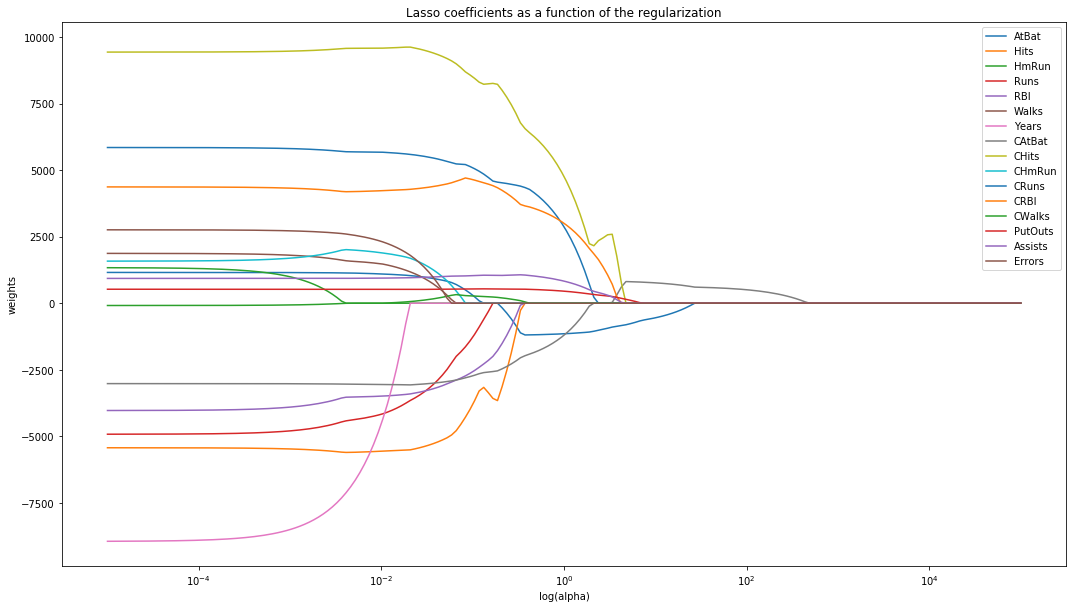

In [68]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False, max_iter=10000)
    lasso.fit(X_norm, y)
    coefs.append(lasso.coef_)

# #############################################################################
# Display results
plt.figure(figsize=(18,10))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.legend(X.columns)
plt.xlabel('log(alpha)')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [69]:
coefs

[array([ 1156.3080872 , -5433.25838888,  1334.22719626, -4924.11195913,
        -4033.01003004,  1872.37701431, -8948.82047426, -3022.28465372,
         9438.4780454 ,  1581.25586435,  5851.93360717,  4371.146192  ,
          -86.31577827,   525.18778942,   931.66317202,  2758.41566675]),
 array([ 1156.302259  , -5433.31368547,  1333.80456287, -4923.95688216,
        -4032.85229896,  1872.29211931, -8948.27278732, -3022.29030068,
         9438.52165229,  1581.39402705,  5851.88436522,  4371.08877038,
          -86.29053775,   525.18756176,   931.66412123,  2758.36889486]),
 array([ 1156.29571673, -5433.37576893,  1333.33008301, -4923.78278089,
        -4032.67521805,  1872.19680934, -8947.65791087, -3022.29664091,
         9438.57061081,  1581.54914008,  5851.82908206,  4371.02430401,
          -86.26220047,   525.18730617,   931.66518689,  2758.31638509]),
 array([ 1156.28837195, -5433.44546808,  1332.7973997 , -4923.58732299,
        -4032.47641501,  1872.0898079 , -8946.96760879, -3

In [51]:
from sklearn.linear_model import LassoCV, RidgeCV

reg = LassoCV(cv=10).fit(X_norm, y)
print('optimal value of the regularization penality is:',reg.alpha_)

#np.sort(np.absolute(reg.coef_))

lasso = Lasso(alpha=reg.alpha_, fit_intercept=False, max_iter=10000)
lasso.fit(X_norm, y)

print(pd.Series(lasso.coef_, index=X.columns))
print('Predictors left are: CHits, CRuns, CRBI')

/Users/Cassie/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


optimal value of the regularization penality is: 0.1371821429861081
AtBat         0.000000
Hits      -3226.885112
HmRun        -0.000000
Runs       -513.865773
RBI       -2240.520857
Walks         0.000000
Years        -0.000000
CAtBat    -2602.272170
CHits      8234.916303
CHmRun        0.000000
CRuns      4811.819918
CRBI       4510.463362
CWalks      247.637120
PutOuts     538.418916
Assists    1051.170592
Errors        0.000000
dtype: float64
Predictors left are: CHits, CRuns, CRBI


## 1.2 Ridge

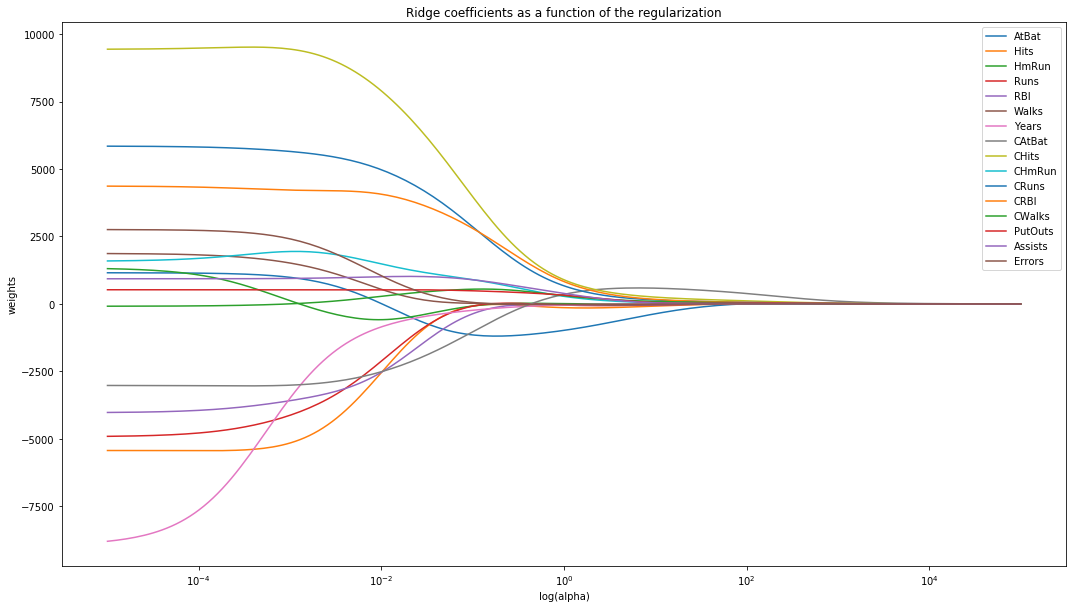

In [76]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
coeffs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False, max_iter=10000)
    ridge.fit(X_norm, y)
    coeffs.append(ridge.coef_[0])

# #############################################################################
# Display results
plt.figure(figsize=(18,10))
ax = plt.gca()

ax.plot(alphas, coeffs)
ax.set_xscale('log')
plt.legend(X.columns)
plt.xlabel('log(alpha)')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [77]:
reg = RidgeCV(cv=10).fit(X_norm, y)
print('optimal value of the regularization penality is:',reg.alpha_)

#np.sort(np.absolute(reg.coef_))

ridge = Ridge(alpha=reg.alpha_, fit_intercept=False, max_iter=10000)
ridge.fit(X_norm, y)

print(pd.Series(ridge.coef_[0], index=X.columns))

optimal value of the regularization penality is: 0.1
AtBat     -1149.870139
Hits        -77.698989
HmRun       -77.855076
Runs        -83.047343
RBI        -365.618403
Walks        21.851495
Years      -235.280727
CAtBat    -1033.019163
CHits      3973.802475
CHmRun      901.948356
CRuns      2857.734350
CRBI       2799.612355
CWalks      546.569567
PutOuts     486.973247
Assists     896.068544
Errors       54.715649
dtype: float64


## 2

Bias variance tradeoff means lowers bias will have higher variance, higher bias will have lower variance. High bias might cause the problem of underfitting. High variance might cause the problem of overfitting. Regularization is to find a balance between bias and variance.